#Collect data
data collected from kaggle https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [ ]:
#need to upload 'kaggle.json' file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 58.3MB/s]


In [ ]:
#unzip downloaded zip folder
import zipfile
zip_ref = zipfile.ZipFile('/content/twitter-entity-sentiment-analysis.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#import modules 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#assign dataset

#column name is not given in csv
column_name= ['tweet_id','entity','sentiment','tweet']
train= pd.read_csv('/content/twitter_training.csv',names=column_name)
test= pd.read_csv('/content/twitter_validation.csv',names=column_name)

In [ ]:
#import modules 2
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


#Explore data
went through data for better understanding about contains of the file

In [ ]:
train.shape, test.shape

((74682, 4), (1000, 4))

In [ ]:
train.head()

,tweet_id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
test.head()

,tweet_id,entity,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


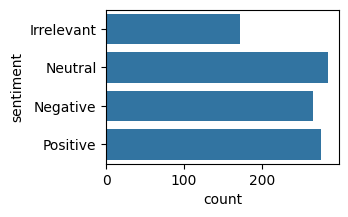

In [ ]:
#plot frequency of 'sentiment'
plt.figure(figsize=(3,2))
sns.countplot(test['sentiment'])
plt.show()


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   1000 non-null   int64 
 1   entity     1000 non-null   object
 2   sentiment  1000 non-null   object
 3   tweet      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


**check if there is NaN values**

In [ ]:
train.isna().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet,686


In [ ]:
train[train['tweet'].isna()]

,tweet_id,entity,sentiment,tweet
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [ ]:
test.isna().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet,0


In [ ]:
test[test['tweet'].isna()]

,tweet_id,entity,sentiment,tweet


> summary of NaN values

| |tweet_id|	entity|	sentiment|	tweet|
|---|---|---|---|---|
|train|0|0|0|686|
|test|0|0|0|0|

In [ ]:
train.duplicated().sum()

2700

**checking tweets to find any interesting attrbute**


In [ ]:
train['tweet'][70000]

'2008 You know how you buy consoles for specific games, I dead ass bought this card so that I can get the absolute best experience from RhandlerR I want to absolutely immerse myself in this game. RhandlerR ray tracing, all of that, I want it all. pic.twitter.com/neA45IHUvo'

In [ ]:
train.iloc[7000]

,7000
tweet_id,9204
entity,Overwatch
sentiment,Neutral
tweet,and Happy Wednesday all!. Well on this fine We...


found links as --

70000- pic.twitter.com/neA45IHUvo

7000- @ twitch.tv/AvgGamer011

In [ ]:
print('total ids: ',len(train['tweet_id'].unique()))
print('total entity: ',len(train['entity'].unique()))
print('total sentiment: ',len(train['sentiment'].unique()))
print('tweet per id= ', 74682/len(train['tweet_id'].unique()))
print('tweet per entity= ', 74682/len(train['entity'].unique()))

total ids:  12447
total entity:  32
total sentiment:  4
tweet per id=  6.0
tweet per entity=  2333.8125


In [ ]:
print('total ids: ',len(test['tweet_id'].unique()))
print('total entity: ',len(test['entity'].unique()))
print('total sentiment: ',len(test['sentiment'].unique()))
print('tweet per id= ', 1000/len(test['tweet_id'].unique()))
print('tweet per entity= ', 1000/len(test['entity'].unique()))

total ids:  1000
total entity:  32
total sentiment:  4
tweet per id=  1.0
tweet per entity=  31.25


| |total id|number of context|tweet/id|tweet/context|
|---|---|---|---|---|
|train|12477|32|6|2333.8125|
|test|1000|32|1|31.25|

In [ ]:
train['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [ ]:
test['sentiment'].value_counts()

,count
sentiment,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


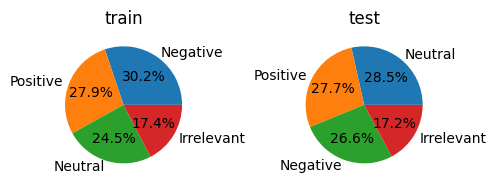

In [ ]:
sentiment_train= train['sentiment'].value_counts()
sentiment_test= test['sentiment'].value_counts()

fig,ax= plt.subplots(1,2,figsize=(5,3))
ax[0].pie(sentiment_train,labels=sentiment_train.index,autopct='%1.1f%%',)
ax[0].set_title('train')
ax[1].pie(sentiment_test,labels=sentiment_test.index,autopct='%1.1f%%',)
ax[1].set_title('test')

plt.tight_layout()
plt.show()

**plot frequency vs context**

<Axes: xlabel='count', ylabel='entity'>

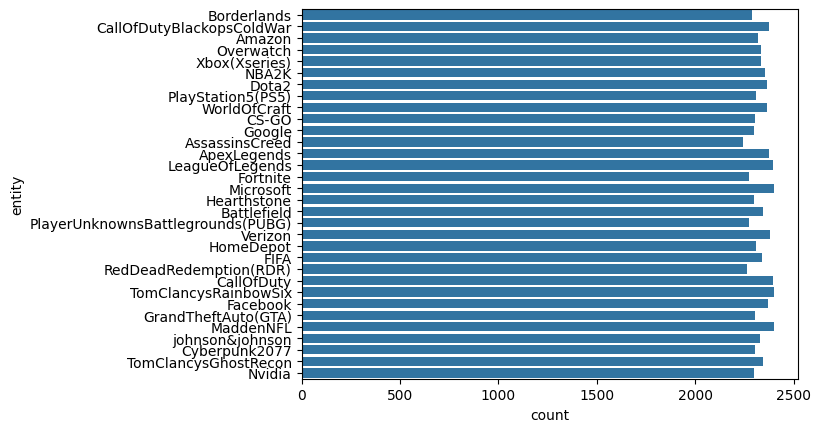

In [ ]:
sns.countplot(train['entity'],stat='count')

<Axes: xlabel='count', ylabel='entity'>

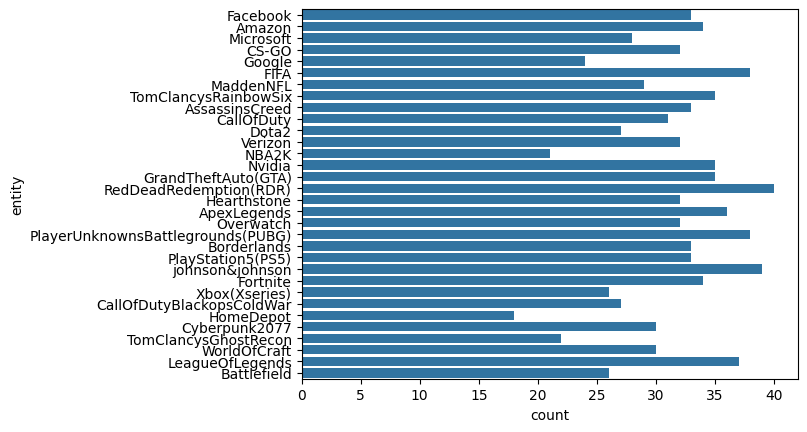

In [ ]:
sns.countplot(test['entity'],stat='count')

In [ ]:
print(len(train['entity'].unique()))
print(len(test['entity'].unique()))

32
32


check if train and test got same contexts or something else is there

In [ ]:
A= train['entity'].unique()
B= test['entity'].unique()
A= set(A)
B= set(B)
print('train&test: ',len(A.intersection(B)),A.intersection(B))

train&test:  32 {'FIFA', 'Battlefield', 'Nvidia', 'TomClancysGhostRecon', 'CallOfDuty', 'Microsoft', 'Facebook', 'CS-GO', 'RedDeadRedemption(RDR)', 'MaddenNFL', 'CallOfDutyBlackopsColdWar', 'Cyberpunk2077', 'LeagueOfLegends', 'Amazon', 'NBA2K', 'PlayerUnknownsBattlegrounds(PUBG)', 'Google', 'ApexLegends', 'Overwatch', 'AssassinsCreed', 'Verizon', 'Hearthstone', 'HomeDepot', 'Xbox(Xseries)', 'TomClancysRainbowSix', 'Dota2', 'Fortnite', 'GrandTheftAuto(GTA)', 'johnson&johnson', 'Borderlands', 'PlayStation5(PS5)', 'WorldOfCraft'}


#Deductions
1. there are links
2. there are emojis
3. there are @
4. train['tweet'] got NaN values
4. there may be fast typing
6. there may spelling mistake
7. there may synonymes
8. there are stop words
9.


#Tasks
1. drop NaN values
1. drop Duplicates
1. need corefference
2. solve fast typings
3. solve spelling errors
4. remove links and mentions
5. synomyme remove
6. handle emoji
7. remove stop word
8. try name-entity-recognition
9. detect language. if possible translate and back
10. Stemming


#Model plan
1. logistic Regression
2. SVM
3. Random Forest
4. RNN
5. transfer learning



#Preprocessing

**drop id column**

In [ ]:
train.drop('tweet_id',axis=1,inplace=True)
test.drop('tweet_id',axis=1,inplace=True)
train.shape, test.shape

((74682, 3), (1000, 3))

**cleared rows with no tweet**

In [ ]:
train= train[train['tweet'].notna()]
train.shape

(73996, 3)

**drop duplicates**

In [ ]:
train.drop_duplicates(inplace=True)
train.shape

(70958, 3)

In [ ]:
#import modules 3
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
!pip install textblob
!pip install wordcloud
!pip install tqdm

In [ ]:
#import module 4
import textblob
from wordcloud import WordCloud
from tqdm import tqdm

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 14.5 MB/s eta 0:00:00


In [ ]:
#import moudule 5
import emoji
import spacy

###**Task1-- remove fast typing.**
> below dictionary is from internet.

In [ ]:
#fast typing -- task1
replacement_dict = {
    r'\br\b'         : 'are'           ,          r'\bwkly\b'    : 'weekly'   ,
    r'\bk\b'         : 'ok'            ,          r'\bu\b'       : 'you'      ,
    r'\btkts\b'      : 'tickets'       ,          r'\bb\b'       : 'be'       ,
    r'\baft\b'       : 'after'         ,          r'&amp;'       : ''         ,
    r'â€™'           : "'"             ,          r'\bur\b'      : 'your'     ,
    r'\bv\b'         : 'very'          ,          r'\bpls\b'     : 'please'   ,
    r'\bc\b'         : 'see'           ,          r'\blar\b'     : 'later'    ,
    r'\bda\b'        : 'the'           ,          r'frnd'        : 'friend'   ,
    r'\bwat\b'       : 'what'          ,          r'\babt\b'     : 'about'    ,
    r'\bwen\b'       : 'when'          ,          r'\benuff\b'   : 'enough'   ,
    r'\bn\b'         : 'in'            ,          r'\brply\b'    : 'reply'    ,
    r'\bthk\b'       : 'think'         ,          r'\btot\b'     : 'thought'  ,
    r'\bnite\b'      : 'night'         ,          r'\bnvm\b'     : 'never mind',
    r'\btxt\b'       : 'text'          ,          r'\btxting\b'  : 'texting'  ,
    r'\bgr8\b'       : 'great'         ,          r'\bim\b'      : 'i am'     ,
    r'\b<unk>\b'     : ''              ,          r'\bfav\b'     : 'favorite' ,
    r'\bdlvr\b'      : 'deliver'       ,          r"(?<=\s)'m(?=\s)|^'m(?=\s)|(?<=\s)'m$" : 'am',
    r'\b\w*\d\w*\b'  : ''              ,          r"(?<=\s)<unk>(?=\s)|^<unk>(?=\s)|(?<=\s)<unk>$": ''


}

In [ ]:
def replace_words(text):
    for pattern, replacement in replacement_dict.items():
        text = re.sub(pattern, replacement, text)
    return text

In [ ]:
train['tweet'] = train['tweet'].apply(replace_words)
test['tweet'] = test['tweet'].apply(replace_words)

train.shape, test.shape

((70958, 3), (1000, 3))

###**Task2-- replace emojis with their meaning**

In [ ]:
#emoji --task2
def emoji_decode(text):
  demojize_text= emoji.demojize(text)
  demojize_text = re.sub(r':', '', demojize_text)
  demojize_text = re.sub(r'_', ' ', demojize_text)
  return demojize_text

In [ ]:
emoji_decode('👾')

'alien monster'

In [ ]:
train['tweet']= train['tweet'].apply(emoji_decode)
test['tweet']= test['tweet'].apply(emoji_decode)

train.shape,test.shape

((70958, 3), (1000, 3))

###**Task3 -- remove links and domains**


|exaples|
|---|
|http, https|
|www|
|.com, .org, .edu, .gov, ....|
|Rhandler, RhttpR, RwebR|

and others

In [ ]:
#links and mentions --task3
def remove_url_and_domains(text):
    # Remove the URLs
    re_url = re.compile(r'https?://\S+|www\.\S+')
    text = re_url.sub('', text)

    # Define the regex pattern to match text containing domain-like patterns
    pattern = r'\b(?:\w+@\w+\.\w+|\w+\.\w+|\w+\.(?:com|tv|org|net|edu|gov|mil|int))\b'

    # Replace matched patterns with an empty string
    text = re.sub(r'\S*\b(?:\w+@\w+\.\w+|\w+\.\w+|\w+\.(?:com|tv|org|net|edu|gov|mil|int))\b\S*', '', text)

    # Remove custom patterns like RhandlerR, RhttpsR
    custom_pattern = r'\bR(?:handler|https|http|web|other_patterns_here)R\b'
    text = re.sub(custom_pattern, '', text)

    # Remove multiple spaces resulting from removal and trim leading/trailing spaces
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    return cleaned_text

In [ ]:
train['tweet'][70000]

' You know how you buy consoles for specific games, I dead ass bought this card so that I can get the absolute best experience from RhandlerR I want to absolutely immerse myself in this game. RhandlerR ray tracing, all of that, I want it all. pic.twitter.com/'

In [ ]:
text=' You know how you buy consoles for specific games, I dead ass bought this card so that I can get the absolute best experience from RhandlerR I want to absolutely immerse myself in this game. RhandlerR ray tracing, all of that, I want it all. pic.twitter.com/'

In [ ]:
remove_url_and_domains(text)

'You know how you buy consoles for specific games, I dead ass bought this card so that I can get the absolute best experience from I want to absolutely immerse myself in this game. ray tracing, all of that, I want it all.'

In [ ]:
train['tweet']= train['tweet'].apply(remove_url_and_domains)
test['tweet']= test['tweet'].apply(remove_url_and_domains)


###**Task4 -- remove puctuations and special charecters**



In [ ]:
#punctuation --task4
def remove_punctuation(text):
    text = re.sub(r'_', " ", text)
    text= text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [ ]:
sample_text = "Hello, World! This is a test. Let's &remove #punctuation & @ special_characters... 123!()"
remove_punctuation(sample_text)

'Hello World This is a test Lets remove punctuation special characters 123'

In [ ]:
train['tweet']= train['tweet'].apply(remove_punctuation)
test['tweet']= test['tweet'].apply(remove_punctuation)

###**Task5-- lowercasing**

In [ ]:
#lowercasing --task5
def lower_case(text):
  return text.lower()

In [ ]:
train['tweet']= train['tweet'].apply(lower_case)
test['tweet']= test['tweet'].apply(lower_case)

###**Try --- check spellings and correct them if needed, preserve named entities.**

In [ ]:
#spellings
from textblob import TextBlob
nlp= spacy.load('en_core_web_sm')

In [ ]:
def spell_correcter(text):
  tblb= TextBlob(text)
  return tblb.correct().string

In [ ]:
spell_correcter(text)

' You know how you buy console for specific games, I dead ass bought this card so that I can get the absolute best experience from RhandlerR I want to absolutely immense myself in this game. RhandlerR ray tracing, all of that, I want it all. pick.twitter.com/'

In [ ]:
text= "daey of wrrong doingg ins overr thumbs_up note book at least google youtube"
spell_correcter(text)

'day of wrong doing in over thumbs_up note book at least goose couture'

>spell_correcter() is not woring properly

In [ ]:
def correct_spelling_preserve_entities(text):
    # Use spaCy to process the text and identify entities
    doc = nlp(text)

    # Initialize a list to hold the final corrected text
    corrected_tokens = []

    for token in doc:
        # Check if the token is part of a named entity
        if token.ent_type_:
            # If it is a named entity, don't correct it, just add it as is
            corrected_tokens.append(token.text)
        else:
            # Otherwise, correct the spelling
            corrected_word = str(TextBlob(token.text).correct())
            corrected_tokens.append(corrected_word)

    # Join the tokens back into a single string
    corrected_text = ' '.join(corrected_tokens)
    corrected_text = re.sub(r'\s+', ' ', corrected_text).strip()

    return corrected_text

In [ ]:
sample_text = "I havv a speling eror in this sentnce. Google and Microsft are big tech compnies. Jhon mrries Clara. yumekuyi high school"

In [ ]:
correct_spelling_preserve_entities(sample_text)

'I have a spelling error in this sentence . Google and Microsft are big teach companies . Jhon marries Clara . yumekuyi high school'

In [ ]:
tqdm.pandas()
train['tweet']= train['tweet'].progress_apply(correct_spelling_preserve_entities)
#test['tweet']= test['tweet'].apply(correct_spelling_preserve_entities)

#train.shape, test.shape

  0%|          | 86/70958 [00:56<12:56:44,  1.52it/s]


KeyboardInterrupt: 

In [ ]:
trial=train.iloc[:100]

In [ ]:
tqdm.pandas()
trial['tweet']= trial['tweet'].progress_apply(correct_spelling_preserve_entities)

100%|██████████| 100/100 [01:47<00:00,  1.07s/it]
<ipython-input-38-c288489f46fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial['tweet']= trial['tweet'].progress_apply(correct_spelling_preserve_entities)


`correct_spelling_preserve_entities()` is **discarded** because of time. expected time of compilition on train data --

||time|
|---|---|
|cpu|12~16 hrs|
|gpu|around 10hrs|
|tpu|8~10hrs|


### **Try -- change synonymes**

In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True



```
from nltk.corpus import wordnet
from nltk.corpus import wordnet_ic
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

# Load information content (IC) for semantic similarity measures
nltk.download('wordnet_ic')
brown_ic = wordnet_ic.ic('ic-brown.dat')

def get_synonym(word, pos_tag):
    # Map POS tag to WordNet POS tag
    pos = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'J': wordnet.ADJ, 'R': wordnet.ADV}
    wordnet_pos = pos.get(pos_tag[0].upper(), wordnet.NOUN)
    
    # Get synonyms and filter by POS
    synonyms = []
    for syn in wordnet.synsets(word, pos=wordnet_pos):
        for lemma in syn.lemmas():
            # Exclude the original word and rare/uncommon words
            if lemma.name().lower() != word.lower() and '_' not in lemma.name():
                synonyms.append(lemma.name())

    # Choose the most similar synonym if available
    if synonyms:
        return synonyms[0].replace('_', ' ')
    else:
        return word

def replace_synonyms(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    
    replaced_words = [get_synonym(word, pos) for word, pos in pos_tags]
    return ' '.join(replaced_words)

# Example usage
sample_text = "The quick brown fox jumps over the lazy dog"
replaced_text = replace_synonyms(sample_text)
print(replaced_text)

```
output -->
```
The speedy brownness dodger jump over the faineant frump

```



In [ ]:
def get_synonym(word):
    # Get the first synonym for the word
    synonyms = wordnet.synsets(word)

    if synonyms:
        # Get the first synonym's name (lemma) that is not the same as the original word
        for lemma in synonyms[0].lemmas():
            synonym = lemma.name()
            if synonym.lower() != word.lower():
                return synonym.replace('_', ' ')

    # Return the original word if no synonym is found
    return word

In [ ]:
def replace_with_synonyms(text):
    words = nltk.word_tokenize(text)
    replaced_words = []

    for word in words:
        synonyms = get_synonym(word)
        # Replace with a synonym if available, otherwise keep the original word
        if synonyms:
            synonym = synonyms.pop()  # Get a synonym (you could use a more sophisticated selection method)
            replaced_words.append(synonym)
        else:
            replaced_words.append(word)

    return ' '.join(replaced_words)


>**Synomyme discarded as amiguity and comlexity**

###**Task6 -- drop stop words**

In [ ]:
#drop stop words --task6
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'ve', 'as', 'o', 'aren', 'some', 'needn', 'down', "don't", 'now', 'himself', 'with', 'isn', 'wouldn', "she's", "you'll", 'was', 'being', 'than', 'whom', 'about', 'in', 'i', 'again', 'her', 'haven', 'own', 'she', 'itself', "didn't", "weren't", 'more', 'themselves', 'ourselves', 'when', 'wasn', 'herself', 'shan', 'just', 'once', 'our', "you'd", 'not', 'all', 'can', "wasn't", 'yours', "you've", 'ain', 'each', 'who', "shouldn't", 'y', 'against', "should've", 'my', 're', 'that', 'at', 'me', 'they', 'such', 'you', 'be', 'doing', 'while', 'and', 'them', 'yourself', 'do', 'under', 'into', 'll', 'their', 'hadn', 'for', 'no', 'these', 'so', 'an', 'does', 'below', "won't", "that'll", 'doesn', 'most', 'don', 'hers', "aren't", 'am', 'over', "you're", 'how', 'of', 'or', 'until', 'a', 'ma', 'he', 'been', 't', 'out', "mightn't", "wouldn't", 'it', 'what', 'to', 'there', 'why', "isn't", 'yourselves', 'are', 'shouldn', 'ours', 'theirs', 'this', 'we', 'by', 'the', 'd', 'its', 'further', "hasn't", 'few', 

In [ ]:
contractions_dict = {
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'ve": " have",
    "'m": " am",
    "won't": "will not",
    "can't": "cannot",
    "I'm": "I am",
    "he's": "he is",
    "she's": "she is",
    "it's": "it is",
    "they're": "they are",
    "we're": "we are",
    "aren't": "are not",
    "isn't": "is not",
    "didn't": "did not",
    "don't": "do not",
    "doesn't": "does not",
    "wasn't": "was not",
    "weren't": "were not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not"
}

In [ ]:
def remove_stops(text):
  words= text.split()
  filtered_words= [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

In [ ]:
sample_text = "I havv a speling eror in this sentnce. Google and Microsft are big tech compnies. Jhon mrries Clara. yumekuyi high school. it's very joyful day. i am happy. i won't tell. doesn't haven't should've wasn't "

In [ ]:
sample_text= remove_stops(sample_text)
sample_text

'havv speling eror sentnce. Google Microsft big tech compnies. Jhon mrries Clara. yumekuyi high school. joyful day. happy. tell.'

In [ ]:
sample_text= correct_spelling_preserve_entities(sample_text)
sample_text

'have spelling error sentence . Google Microsft big teach companies . Jhon marries Clara . yumekuyi high school . joyful day . happy . tell .'

In [ ]:
tqdm.pandas()
train['tweet']= train['tweet'].apply(remove_stops)
test['tweet']= test['tweet'].apply(remove_stops)

###**Try -- correct spellings 2nd trial**


In [ ]:
tqdm.pandas()
train['tweet']= train['tweet'].progress_apply(correct_spelling_preserve_entities)
test['tweet']= test['tweet'].progress_apply(correct_spelling_preserve_entities)

  0%|          | 276/70958 [03:34<15:16:53,  1.28it/s]


KeyboardInterrupt: 

> **correct spelling discarded as training time around 15hrs**

### **Task7 -- Combine columns**

In [ ]:
train.head()

,entity,sentiment,tweet
0,Borderlands,Positive,getting borderlands murder
1,Borderlands,Positive,coming borders kill
2,Borderlands,Positive,getting borderlands kill
3,Borderlands,Positive,coming borderlands murder
4,Borderlands,Positive,getting borderlands murder


In [ ]:
test.head()

,entity,sentiment,tweet
0,Facebook,Irrelevant,mentioned facebook struggling motivation go ru...
1,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
2,Microsoft,Negative,microsoft pay word functions poorly samsungus ...
3,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...
4,Google,Neutral,president slapping americans face really commi...


In [ ]:
#combine tweet and entity
train['combined_text'] = train['entity'] + " " + train['tweet']
test['combined_text'] = test['entity'] + " " + test['tweet']

In [ ]:
train.drop(['entity','tweet'],axis=1,inplace=True)
test.drop(['entity','tweet'],axis=1,inplace=True)

In [ ]:
train.head()

,sentiment,combined_text
0,Positive,Borderlands getting borderlands murder
1,Positive,Borderlands coming borders kill
2,Positive,Borderlands getting borderlands kill
3,Positive,Borderlands coming borderlands murder
4,Positive,Borderlands getting borderlands murder


In [ ]:
test.head()

,sentiment,combined_text
0,Irrelevant,Facebook mentioned facebook struggling motivat...
1,Neutral,Amazon bbc news amazon boss jeff bezos rejects...
2,Negative,Microsoft microsoft pay word functions poorly ...
3,Negative,CS-GO csgo matchmaking full closet hacking tru...
4,Neutral,Google president slapping americans face reall...


###**Tokenization**

In [ ]:
nlp = spacy.load('en_core_web_sm')
from nltk.tokenize import word_tokenize

In [ ]:
#tokenization
def nltk_word_tokenize(text):
    """
    Tokenizes the input text into words using NLTK's word_tokenize.

    Args:
        text (str): The text to be tokenized.

    Returns:
        List[str]: A list of word tokens.
    """
    tokens = word_tokenize(text)
    return tokens

def spacy_word_tokenize(text):
    """
    Tokenizes the input text into words using spaCy.

    Args:
        text (str): The text to be tokenized.

    Returns:
        List[str]: A list of word tokens.
    """
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [ ]:
sample_text= train['combined_text'][6000]
sample_text

'Amazon heavens fall'

In [ ]:
nltk_word_tokenize(sample_text)

['Amazon', 'heavens', 'fall']

In [ ]:
spacy_word_tokenize(sample_text)

['Amazon', 'heavens', 'fall']

In [ ]:
tqdm.pandas()

train['combined_text']= train['combined_text'].progress_apply(nltk_word_tokenize)
test['combined_text']= test['combined_text'].progress_apply(nltk_word_tokenize)

100%|██████████| 1000/1000 [00:00<00:00, 7061.77it/s]


###**Visualize situation**

In [ ]:
#wordclouds
def plot_word_clouds(df,dataset_name, text_column='combined_text', class_column='sentiment'):

    classes = df[class_column].unique()
    num_classes = len(classes)

    # Set up the plot dimensions
    fig, axes = plt.subplots(1, num_classes, figsize=(6 * num_classes, 6), squeeze=False)
    fig.suptitle(f'Words Clouds For {dataset_name} Dataset',fontsize=25)

    for i, class_label in enumerate(classes):
        # Combine all tokens for the current class
        class_text = ' '.join(df[df[class_column] == class_label][text_column].apply(lambda x: ' '.join(x)))

        # Create the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(class_text)

        # Plot the word cloud
        ax = axes[0, i]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'{class_label} Word Cloud',fontsize=15)

    plt.tight_layout()
    plt.show()

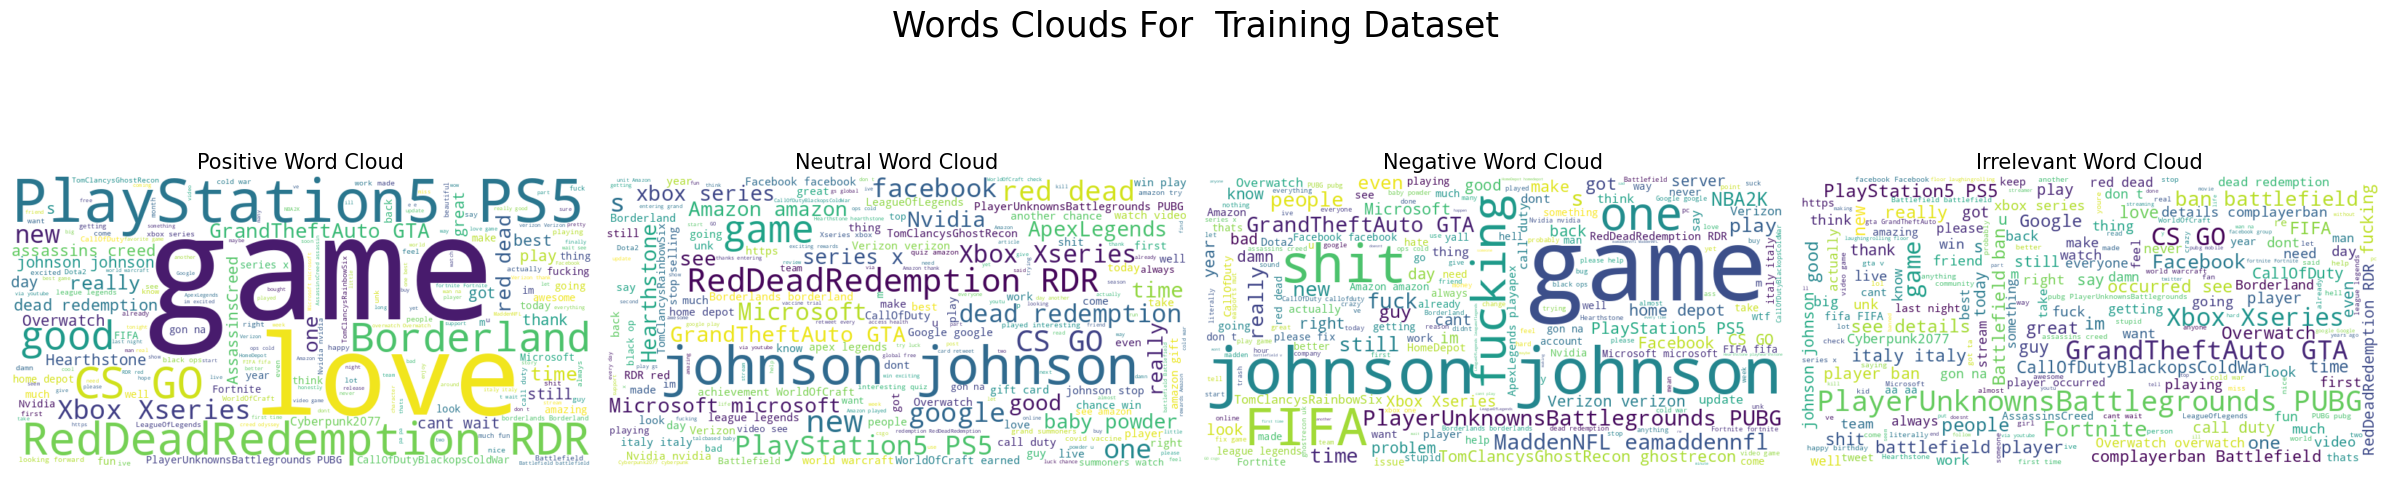

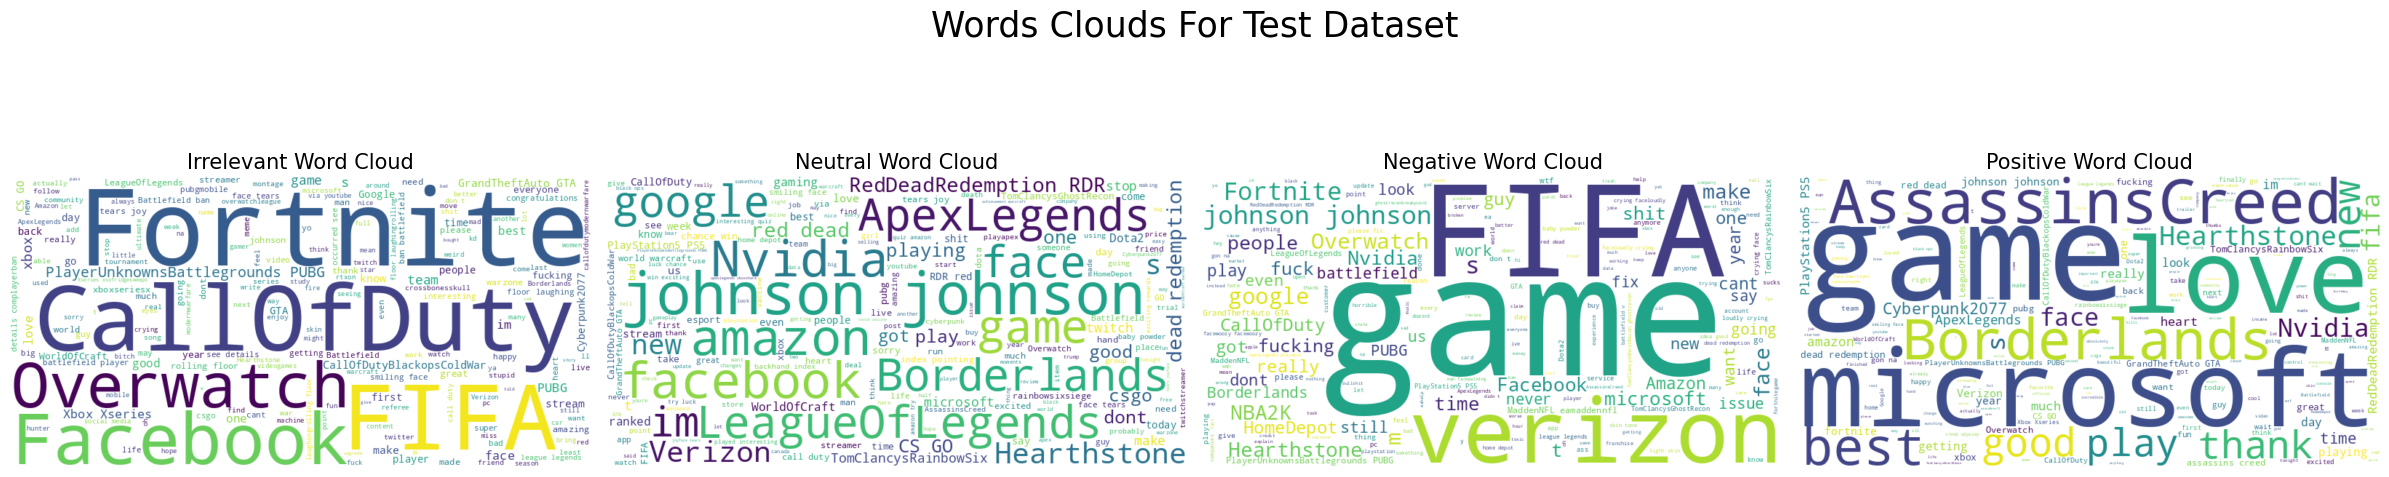

In [ ]:
# Plot the Words Cloud for the Training Dataset
plot_word_clouds(train,' Training')

# Plot the Words Cloud for the Test Dataset
plot_word_clouds(test,'Test')

In [ ]:
import math
from collections import Counter

In [ ]:
#top words
def plot_top_words(df,dataset_name, text_column, class_column, top_n=20):
    # Combine all tokens for each class
    class_tokens = {}
    for sentiment_class in df[class_column].unique():
        class_data = df[df[class_column] == sentiment_class]
        tokens = [token for sublist in class_data[text_column] for token in sublist]
        class_tokens[sentiment_class] = tokens

    # Calculate the frequency of each word for each class
    class_word_freq = {}
    for sentiment_class, tokens in class_tokens.items():
        word_freq = Counter(tokens)
        common_words = word_freq.most_common(top_n)
        class_word_freq[sentiment_class] = dict(common_words)

    # Determine the number of rows and columns for subplots
    num_classes = len(class_word_freq)
    num_cols = 2
    num_rows = math.ceil(num_classes / num_cols)

    # Set up the plot dimensions
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))
    fig.suptitle(f'Frequancies for {dataset_name} Dataset', fontsize=30)
    fig.tight_layout(pad=5.0)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot the top words for each class
    for i, (sentiment_class, word_freq) in enumerate(class_word_freq.items()):
        ax = axes[i]
        sns.barplot(ax=ax, x=list(word_freq.values()), y=list(word_freq.keys()), palette="coolwarm_r")
        ax.set_title(f"Top {top_n} words in {sentiment_class} tweets")
        ax.set_xlabel("Frequency")
        ax.set_ylabel("Words")

        # Add value labels to each bar
        for index, value in enumerate(list(word_freq.values())):
            ax.text(value, index, str(value), color='black', ha="left", va="center")

        # Apply coolwarm color palette
        norm = plt.Normalize(min(word_freq.values()), max(word_freq.values()))
        sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Frequency')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

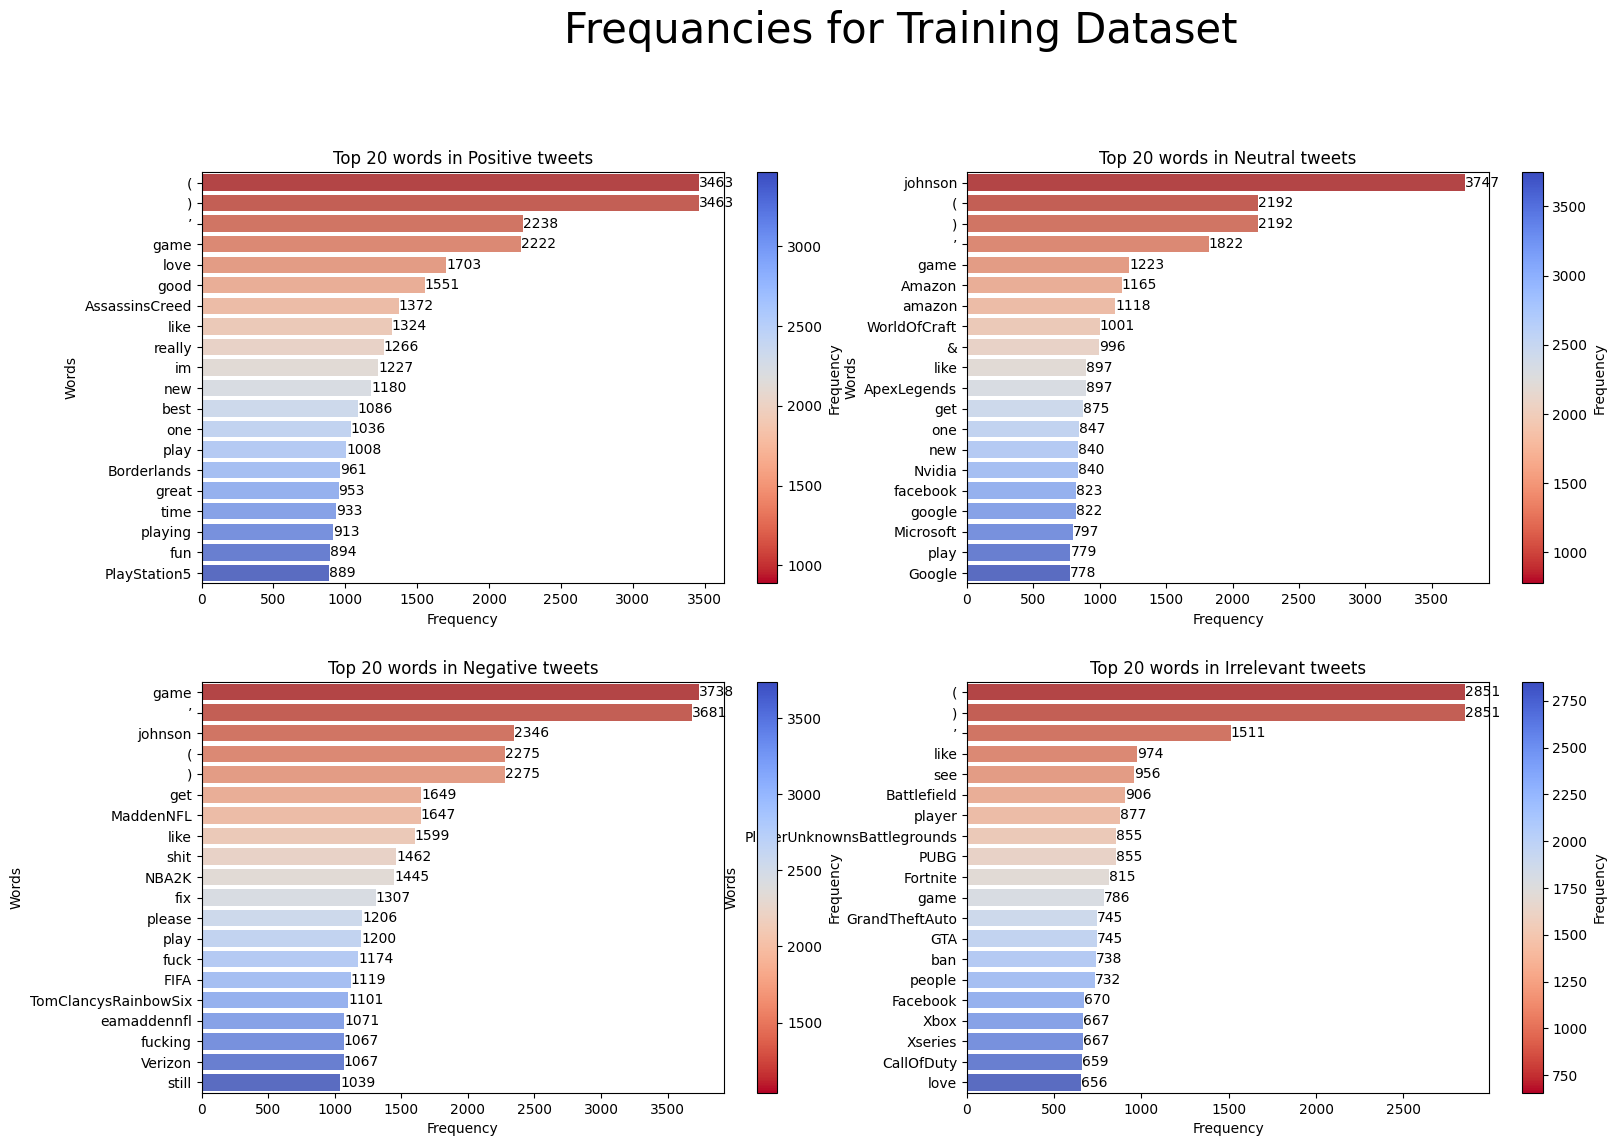

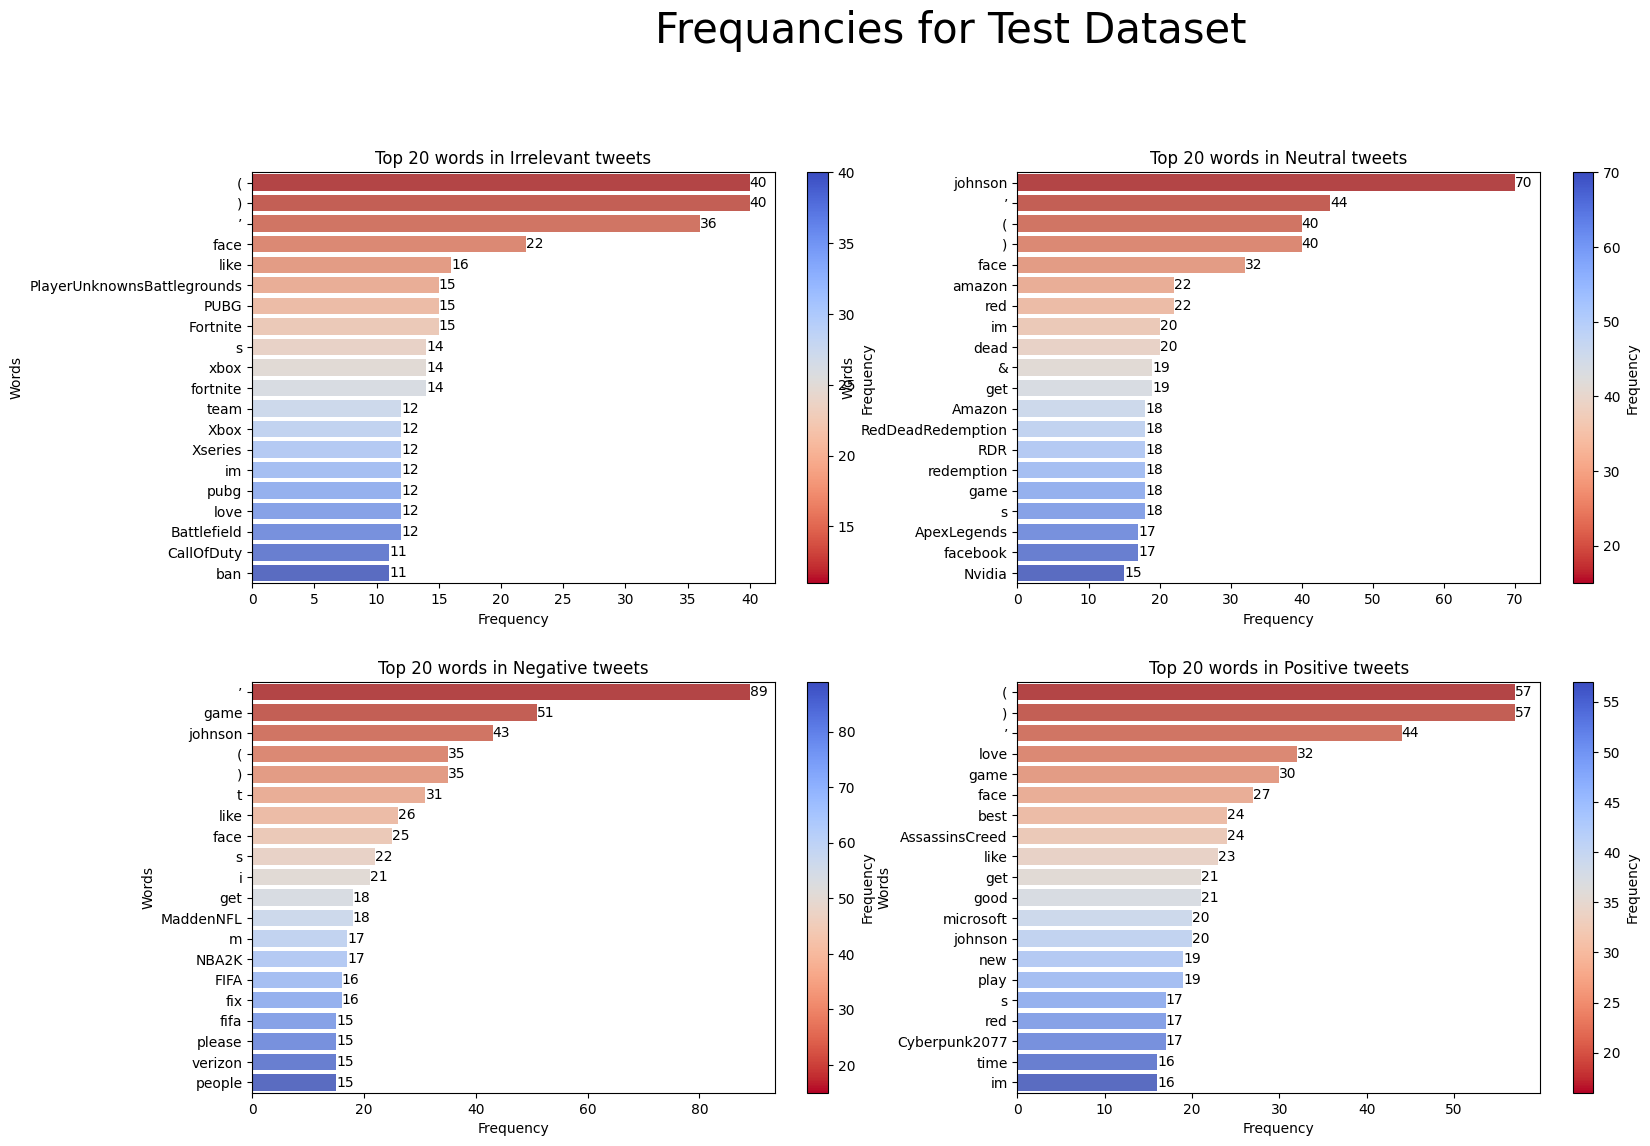

In [ ]:
plot_top_words(train,'Training','combined_text','sentiment')
plot_top_words(test,'Test','combined_text','sentiment')

> problems that arised --


1.   some special charecters [ '(', ')', '.'] appered as words
2.   some single letters appered as tokens -- [s, i, m, t]



###**solve the issue with single letter words**

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation_token(tokens):
    tokens = [token for token in tokens if token not in string.punctuation]
    return tokens

def remove_single_letter_words(tokens):
    tokens = [token for token in tokens if len(token) > 1 or token.lower() == 'i']
    return tokens

def clean_tokenized_text(tokens):
    tokens = remove_punctuation_token(tokens)
    tokens = remove_single_letter_words(tokens)
    return tokens

In [ ]:
#sample_text= train['combined_text'][0]
sample_text= ['Borderlands', 'getting', 'borderlands', 'murder',"$",")","(","m","t","s","tech"]

In [ ]:
clean_tokenized_text(sample_text)

['Borderlands', 'getting', 'borderlands', 'murder', 'tech']

In [ ]:
trial2= train.iloc[:10]

In [ ]:
trial2['combined_text']= trial2['combined_text'].progress_apply(clean_tokenized_text)

100%|██████████| 10/10 [00:00<00:00, 11848.32it/s]


In [ ]:
trial2.head()

,sentiment,combined_text
0,Positive,"[Borderlands, getting, borderlands, murder]"
1,Positive,"[Borderlands, coming, borders, kill]"
2,Positive,"[Borderlands, getting, borderlands, kill]"
3,Positive,"[Borderlands, coming, borderlands, murder]"
4,Positive,"[Borderlands, getting, borderlands, murder]"


In [ ]:
type(train['combined_text'][0][0])

str

### create a copy of current datasets

In [ ]:
balanced_train= train.copy()
balanced_test= test.copy()

In [ ]:
balanced_train['combined_text']= balanced_train['combined_text'].progress_apply(clean_tokenized_text)
balanced_test['combined_text']= balanced_test['combined_text'].progress_apply(clean_tokenized_text)

100%|██████████| 1000/1000 [00:00<00:00, 126307.83it/s]


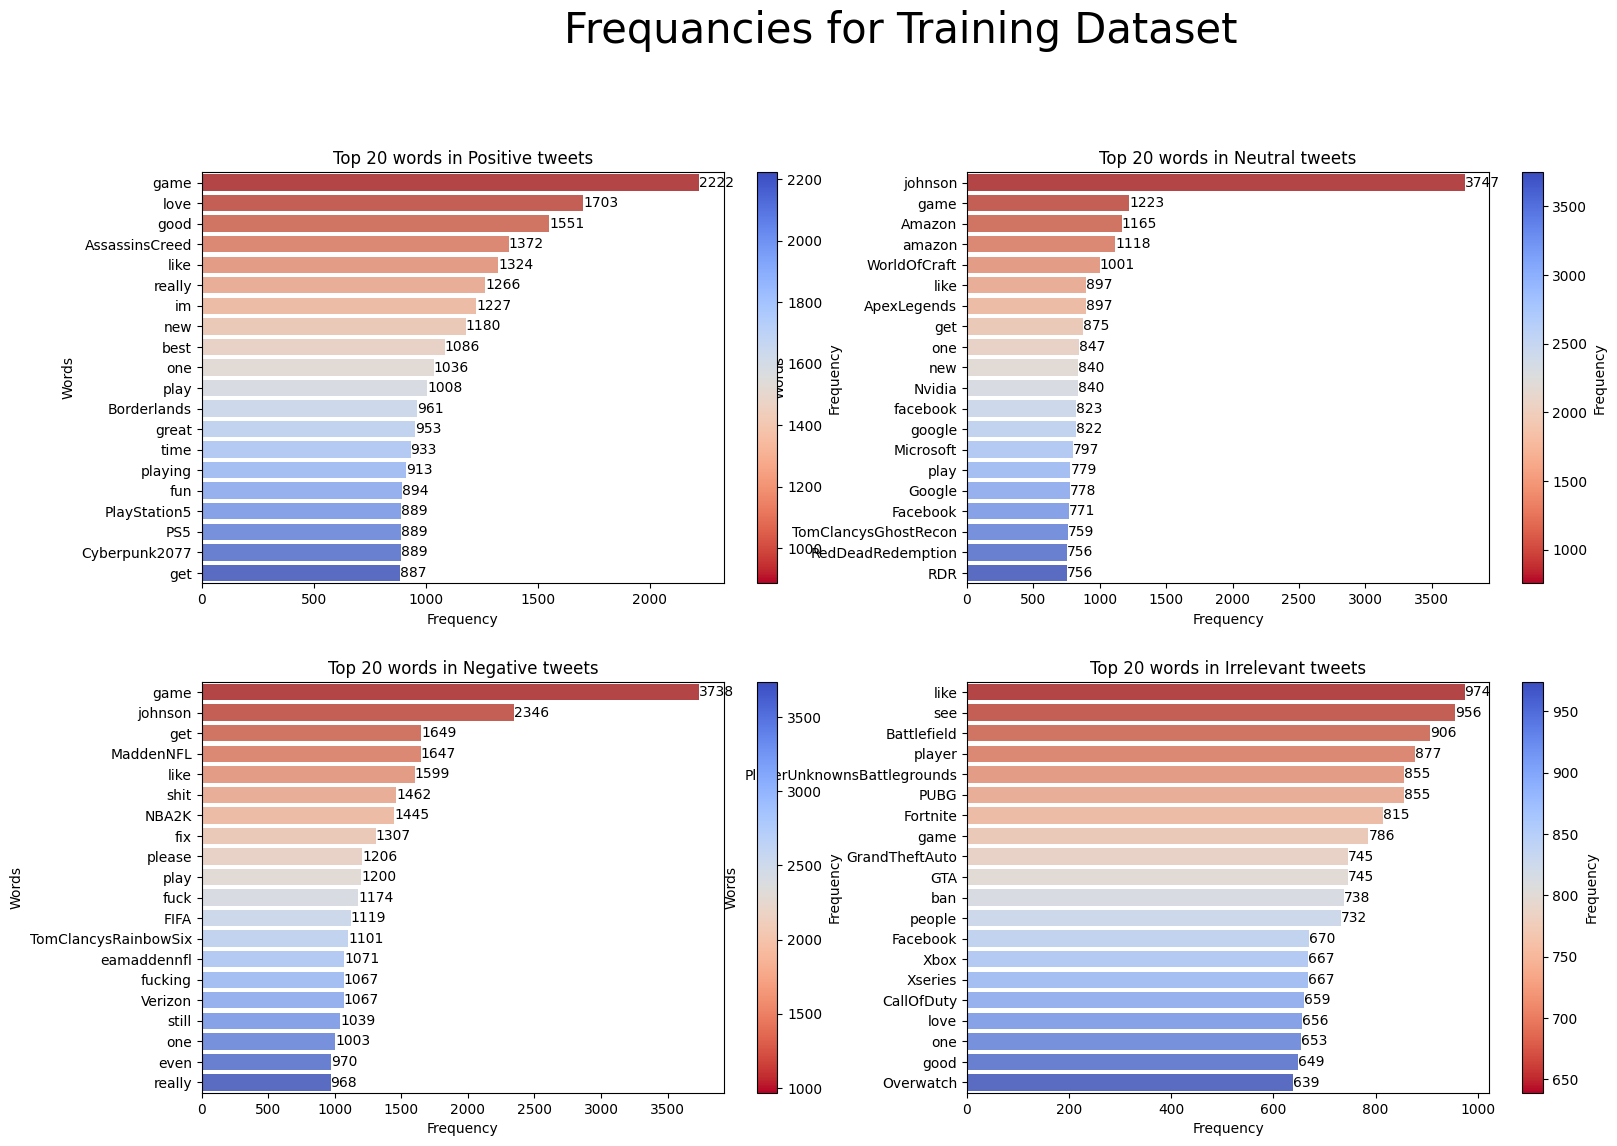

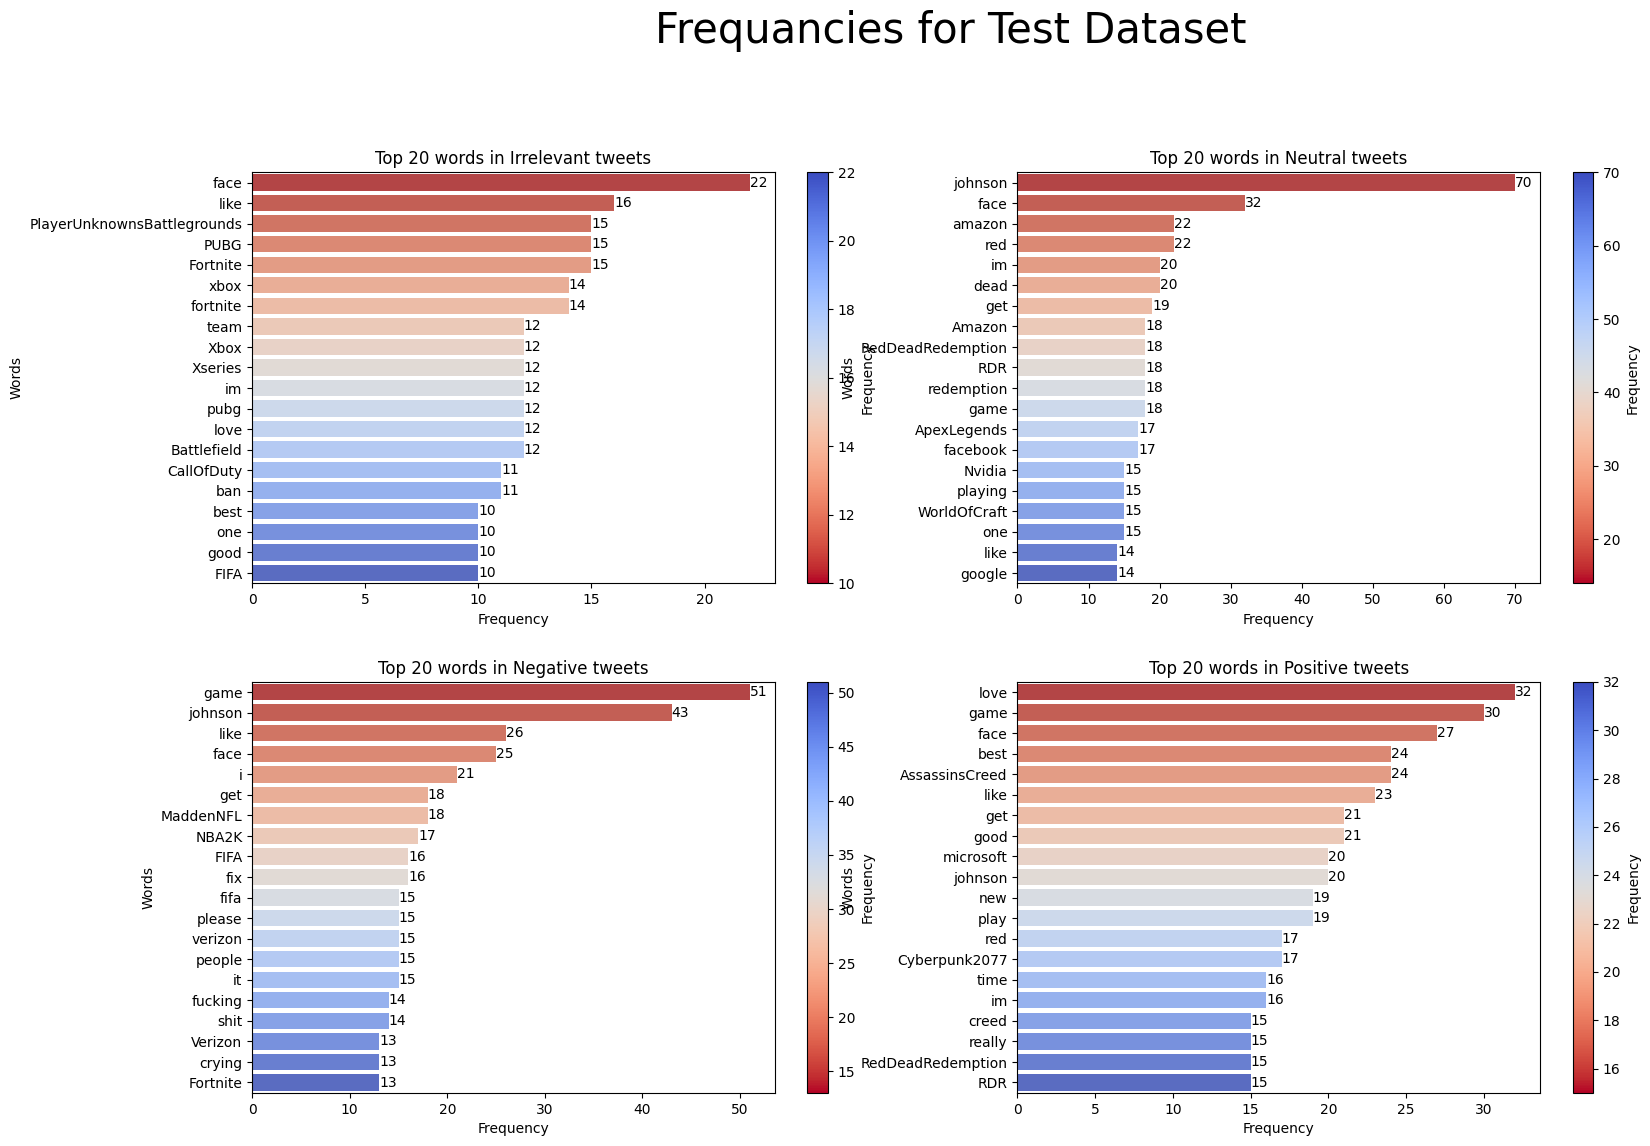

In [ ]:
plot_top_words(balanced_train,'Training','combined_text','sentiment')
plot_top_words(balanced_test,'Test','combined_text','sentiment')

In [ ]:
#dump files
balanced_train.to_csv('balanced_train1.csv',index=False)
balanced_test.to_csv('balanced_test1.csv',index=False)

#ReLoad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
balanced_train= pd.read_csv('balanced_train1.csv')
balanced_test= pd.read_csv('balanced_test1.csv')
balanced_train.shape, balanced_test.shape

((70958, 2), (1000, 2))

In [ ]:
balanced_train.head()

,sentiment,combined_text
0,Positive,"['Borderlands', 'getting', 'borderlands', 'mur..."
1,Positive,"['Borderlands', 'coming', 'borders', 'kill']"
2,Positive,"['Borderlands', 'getting', 'borderlands', 'kill']"
3,Positive,"['Borderlands', 'coming', 'borderlands', 'murd..."
4,Positive,"['Borderlands', 'getting', 'borderlands', 'mur..."


#Feature extraction
using TF-IDF

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import History
from tensorflow.keras.metrics import Precision ,Recall
from sklearn.utils import shuffle

In [ ]:
balanced_train['combined_text'] = balanced_train['combined_text'].apply(lambda tokens: ''.join(tokens))
balanced_test['combined_text'] = balanced_test['combined_text'].apply(lambda tokens: ''.join(tokens))

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train = tfidf.fit_transform(balanced_train['combined_text'])
X_test = tfidf.transform(balanced_test['combined_text'])

X_train.shape, X_test.shape

((70958, 5000), (1000, 5000))

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(balanced_train['sentiment'])
y_test = le.transform(balanced_test['sentiment'])

y_train.shape, y_test.shape

((70958,), (1000,))

#model build

**Random Forest**

In [ ]:
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
#3min


RandomForestClassifier(random_state=42)

In [ ]:
rf_train_pred= rf.predict(X_train)
print("train accuracy", accuracy_score(y_train,rf_train_pred))

train accuracy 0.9775641929028439


In [ ]:
rf_test_pred= rf.predict(X_test)
print("test accuracy", accuracy_score(y_test,rf_test_pred))

test accuracy 0.974


In [ ]:
print("classificaon report of test\n",classification_report(y_test,rf_test_pred))

classificaon report of test
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       172
           1       0.97      0.98      0.98       266
           2       0.98      0.96      0.97       285
           3       0.97      0.98      0.97       277

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



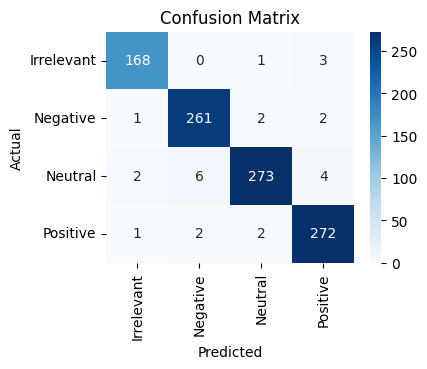

In [ ]:
import matplotlib.pyplot as plt
# Plot confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
logreg_train_pred= logreg.predict(X_train)
print("train accuracy", accuracy_score(y_train,logreg_train_pred))

train accuracy 0.7401843343949942


In [ ]:
logreg_test_pred= logreg.predict(X_test)
print("test accuracy", accuracy_score(y_test,logreg_test_pred))

test accuracy 0.784


**ANN**

In [ ]:
nn= Sequential()
nn.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
nn.add(Dropout(0.2))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(len(le.classes_), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,644 (2.47 MB)

 Trainable params: 648,644 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= nn.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_data=(X_test.toarray(), y_test))

Epoch 1/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.5812 - loss: 0.9925 - val_accuracy: 0.8830 - val_loss: 0.3673
Epoch 2/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8527 - loss: 0.4126 - val_accuracy: 0.9420 - val_loss: 0.2034
Epoch 3/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.9259 - loss: 0.2092 - val_accuracy: 0.9490 - val_loss: 0.1789
Epoch 4/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9502 - loss: 0.1351 - val_accuracy: 0.9530 - val_loss: 0.1751
Epoch 5/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9601 - loss: 0.1039 - val_accuracy: 0.9600 - val_loss: 0.1814


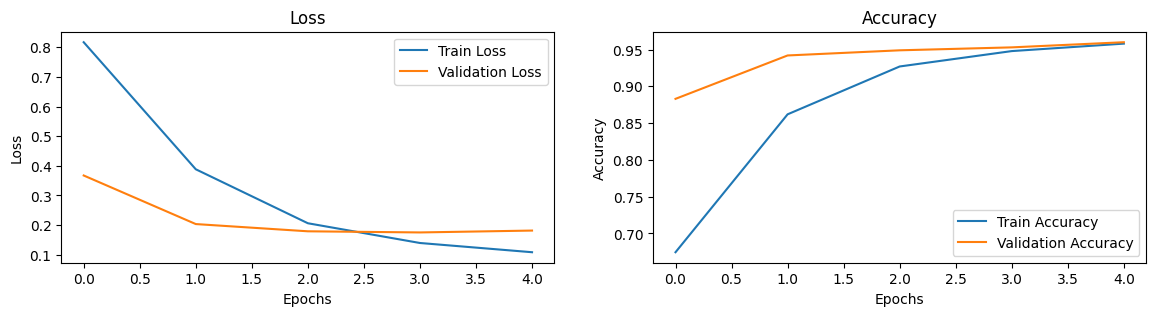

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

# Plot loss
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [ ]:
test_pred_nn = nn.predict(X_test.toarray())
test_pred_nn_classes = test_pred_nn.argmax(axis=1)

print("Classification Report:")
print("Classification Report:\n",classification_report(y_test, test_pred_nn_classes))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       172
           1       0.98      0.96      0.97       266
           2       0.96      0.95      0.96       285
           3       0.95      0.96      0.95       277

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



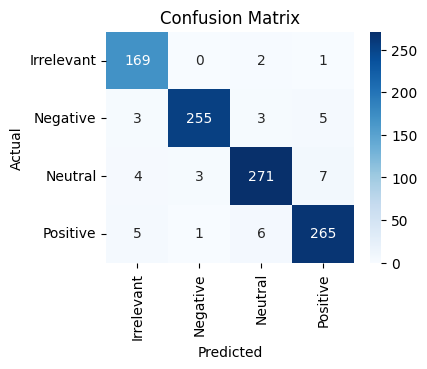

In [ ]:
import matplotlib.pyplot as plt
# Plot confusion matrix
cm = confusion_matrix(y_test, test_pred_nn_classes)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



---



---



---



#model dumping

In [ ]:
import joblib
joblib.dump(rf, 'rf_model.pkl')
nn.save('nn_model.h5')


|model|size|
|---|---|
|nn_model.h5| 7.45Mb|
|rf |336.68Mb|

In [ ]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

#Example prediction

In [ ]:
test.iloc[56]

,56
sentiment,Positive
combined_text,CallOfDutyBlackopsColdWar like killstreaks


In [ ]:
example1= test.iloc[450]['combined_text']
example1

'Fortnite fortnite bots make game unplayed lmfao literally unplayable course land axe loot bot weapons already ground shoots even arm lmfao fortnite right waste data'

In [ ]:
rf_pred= rf.predict(tfidf.transform([example1]))
rf_pred

array([1])

In [ ]:
le.inverse_transform(rf_pred)

array(['Negative'], dtype=object)

In [ ]:
nn_pred= nn.predict(tfidf.transform([example1]).toarray())
le.inverse_transform(nn_pred.argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array(['Negative'], dtype=object)

In [ ]:
example2= test.iloc[456]['combined_text']
example2

'johnson&johnson realdonaldtrump plans rush vaccine fucked buddy'

In [ ]:
rf_pred2= rf.predict(tfidf.transform([example2]))
le.inverse_transform(rf_pred2)

array(['Irrelevant'], dtype=object)

In [ ]:
nn_pred2= nn.predict(tfidf.transform([example2]).toarray())
le.inverse_transform(nn_pred2.argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array(['Irrelevant'], dtype=object)

In [ ]:
example3= test.iloc[56]['combined_text']
example3

'CallOfDutyBlackopsColdWar like killstreaks'

In [ ]:
rf_pred3= rf.predict(tfidf.transform([example3]))
le.inverse_transform(rf_pred3)

array(['Positive'], dtype=object)

In [ ]:
nn_pred3= nn.predict(tfidf.transform([example3]).toarray())
le.inverse_transform(nn_pred3.argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array(['Positive'], dtype=object)

In [ ]:
example4= test.iloc[100]['combined_text']
example4

'Verizon thinking face sure data going frustrated kids using immediately angry face verizon app power hands high voltage download app store via google play thumbs'

In [ ]:
rf_pred4= rf.predict(tfidf.transform([example4]))
le.inverse_transform(rf_pred4)

array(['Neutral'], dtype=object)

In [ ]:
nn_pred4= nn.predict(tfidf.transform([example4]).toarray())
le.inverse_transform(nn_pred4.argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array(['Neutral'], dtype=object)